#### DSC 540 Week 9 & 10 Data Wrangling with Python: 
#### Chapter 
#### Author: Brian Reppeto 2/5/2024

###### Activity 9

In [2]:
# import libraries

import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup as bs
import ssl
import re

In [3]:
# check SSL certificate

chk = ssl.create_default_context()
chk.check_hostname = False
chk.verify_mode = ssl.CERT_NONE

In [4]:
# get data from the website using the requests library

top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)

In [5]:
# create a funtion to check the status code of the response and print a message based on the status code

def statchck(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1

In [6]:
# call the function

statchck(response)

Success!


1

In [7]:
# decode the content of the HTTP response to a string

cont = response.content.decode(response.encoding)

In [8]:
# create a bs object for parsing HTML

soup = bs(cont, 'html.parser')

#### Find href tags and store them in the list of links & print first 30



In [9]:
# create empty list to hold all the http links

list_links=[]

In [10]:
# for loop through all 'a' tags extracting the href attribute of each link and appending it to list_links

for link in soup.find_all('a'):
    list_links.append(link.get('href'))

In [11]:
# display the first 30 elements of the list_links

list_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

#### find the numeric digits in these links for the Top 100 books.

In [12]:
# create empty list to hold all the #'s

booknumb=[]

In [13]:
# loop through a subset of elements in list_links extracting numeric digits

for i in range(33,133):
    link=list_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknumb.append(int(n[0]))

In [14]:
# print the book numbers

print(booknumb)

[84, 1342, 2701, 1513, 145, 64317, 100, 2641, 37106, 16389, 67979, 394, 6761, 2160, 6593, 1259, 4085, 5197, 174, 11, 2542, 844, 1952, 972, 25344, 1080, 98, 5200, 2554, 345, 1260, 1400, 408, 76, 72953, 43, 39742, 72948, 72950, 6130, 72955, 28054, 1232, 219, 205, 1727, 1661, 1093, 58585, 4300, 41445, 72954, 2591, 768, 2600, 46, 3207, 23, 2000, 42324, 1497, 2814, 5740, 11757, 7370, 72946, 1998, 45, 45502, 600, 1184, 36, 30254, 2852, 161, 11030, 33283, 15399, 8800, 829, 244, 35, 16, 55, 36034, 996, 74, 16328, 120, 514, 2680, 8492, 4363, 158, 27827, 19942, 67098, 3296, 5827, 2148]


In [15]:
# print first 2000 characters

print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2024-02-14300578
last 7 days2104603
last 30 days7457656



Top 100 EBooks yesterday
T

#### find the names of top 100 Ebooks



In [16]:
# create empty list for Ebook names

list_titles_temp=[]

In [17]:
# create a starting index

st_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

In [18]:
# loop 1-100 to add the strings of next 100 lines

for i in range(100):
    list_titles_temp.append(soup.text.splitlines()[st_idx+2+i])

In [19]:
# create empty list

list_ttls=[]

In [20]:
# loop through the first 100 elements of list_titles_temp searching for items and append to list_ttls


for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',list_titles_temp[i]).span()
    list_ttls.append(list_titles_temp[i][id1:id2])

In [21]:
# loop through the list and print the titles

for b in list_ttls:
    print(b)

Top 
Top 
Top 
Top 


Top 

Frankenstein
Pride and Prejudice by Jane Austen 
Moby Dick
Romeo and Juliet by William Shakespeare 
Middlemarch by George Eliot 
The Great Gatsby by F
The Complete Works of William Shakespeare by William Shakespeare 
A Room with a View by E
Little Women
The Enchanted April by Elizabeth Von Arnim 
The Blue Castle
Cranford by Elizabeth Cleghorn Gaskell 
The Adventures of Ferdinand Count Fathom 
The Expedition of Humphry Clinker by T
History of Tom Jones
Twenty years after by Alexandre Dumas and Auguste Maquet 
The Adventures of Roderick Random by T
My Life 
The Picture of Dorian Gray by Oscar Wilde 
Alice
A Doll
The Importance of Being Earnest
The Yellow Wallpaper by Charlotte Perkins Gilman 
The Devil
The Scarlet Letter by Nathaniel Hawthorne 
A Modest Proposal by Jonathan Swift 
A Tale of Two Cities by Charles Dickens 
Metamorphosis by Franz Kafka 
Crime and Punishment by Fyodor Dostoyevsky 
Dracula by Bram Stoker 
Jane Eyre
Great Expectations by Charles Dic

###### Activity 10

In [45]:
# import libraries

import urllib.request, urllib.parse, urllib.error
import json

In [46]:
# open the json api file and extract the api key to store into the omdbapi variable

with open('API_BER.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [48]:
# construct the URL for accessing the OMDB API by passing the api key

serviceurl = 'http://www.omdbapi.com/?'
apikey = '&apikey='+omdbapi

In [49]:
# create a function to format and display information from the json

def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [50]:
# create a function to download and save the poster image of a movie provided in a json

def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    poster_file_extension=poster_url.split('.')[-1]
    poster_data = urllib.request.urlopen(poster_url).read()
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [51]:
# create a function to search for a movie by its title and display specific details about the movie

def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [52]:
# using the function search_movie search for the movie Titanic

search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=e077ced1
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,267,049
imdbID: tt0120338
--------------------------------------------------


In [53]:
# using the function search_movie search for "Random_error"

search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=e077ced1
Error encountered:  Movie not found!


###### API exc. 3


In [25]:
# import libraries

import requests

In [26]:
# Connect to an API of your choice and do a simple data pull

api_key = '81abbd54a783fa7a406cecd44ea2b0fd'

# city to get weather data for

city = 'Cincinnati'

# base url

base_url = 'http://api.openweathermap.org/data/2.5/weather?'

# url with city name and API key

complete_url = base_url + 'q=' + city + '&appid=' + api_key+ '&units=imperial'

# GET request to the API

response = requests.get(complete_url)

# parse JSON response

weather_data = response.json()

# if smt check if the request was successful

if weather_data['cod'] == 200:
    weather_main = weather_data['weather'][0]['main']
    weather_description = weather_data['weather'][0]['description']
    temperature_fahrenheit = weather_data['main']['temp']
    humidity = weather_data['main']['humidity']
    wind_speed = weather_data['wind']['speed']
    print(f"Weather in {city}:")
    print(f"Main: {weather_main}")
    print(f"Description: {weather_description}")
    print(f"Temperature: {temperature_fahrenheit} F")
    print(f"Humidity: {humidity}%")
    
else:
    print("City not found. Please check the city name.")


Weather in Cincinnati:
Main: Clouds
Description: broken clouds
Temperature: 49.01 F
Humidity: 56%


###### Exc. 4

In [27]:
# import libraries


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [28]:
# load the data from the Excel file

file_path = "bb_game_sales.xlsx"
bb_df = pd.read_excel(file_path)

/Applications/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [29]:
# head the new df

bb_df.head()

,Date,Item,Category,Price,Profit,Actual Profit
0,2019-01-01,Beer,Beverages,4.0,0.500000,2.0
1,2019-01-01,Hamburger,Hot Food,3.0,0.666667,2.0
2,2019-01-01,Popcorn,Hot Food,5.0,0.800000,4.0
3,2019-01-01,Pizza,Hot Food,2.0,0.250000,0.5
4,2019-01-01,Bottled Water,Beverages,3.0,0.833333,2.5


In [30]:
# count of categories by date

category_count_by_date = bb_df.groupby(['Date', 'Category']).size().reset_index(name='Category_Count')

In [31]:
# merge the count with the original DataFrame

bb_df = pd.merge(bb_df, category_count_by_date, on=['Date', 'Category'], how='left')

In [32]:
bb_df.head()

,Date,Item,Category,Price,Profit,Actual Profit,Category_Count
0,2019-01-01,Beer,Beverages,4.0,0.500000,2.0,3
1,2019-01-01,Hamburger,Hot Food,3.0,0.666667,2.0,5
2,2019-01-01,Popcorn,Hot Food,5.0,0.800000,4.0,5
3,2019-01-01,Pizza,Hot Food,2.0,0.250000,0.5,5
4,2019-01-01,Bottled Water,Beverages,3.0,0.833333,2.5,3


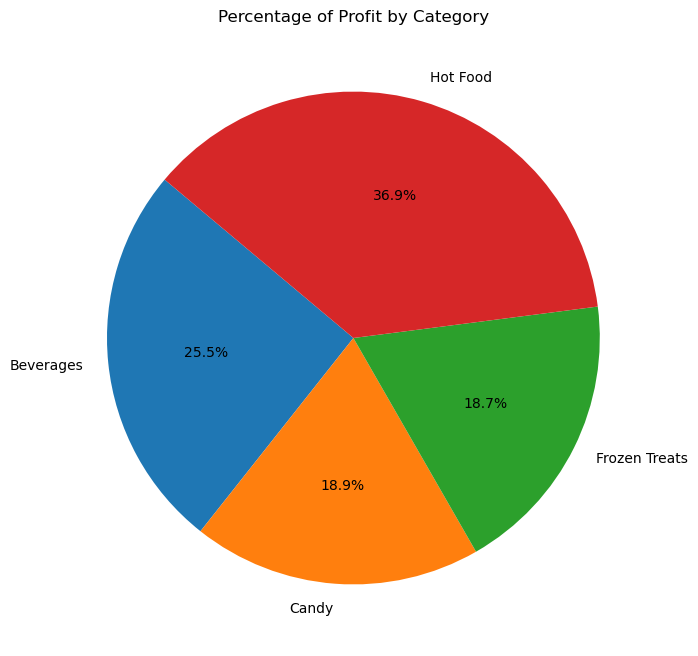

In [33]:
# pie chart

# group by Category and calculate the total profit for each category

total_profit_by_category = bb_df.groupby('Category')['Profit'].sum()


plt.figure(figsize=(8, 8))
plt.pie(total_profit_by_category, labels=total_profit_by_category.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Profit by Category')
plt.show()

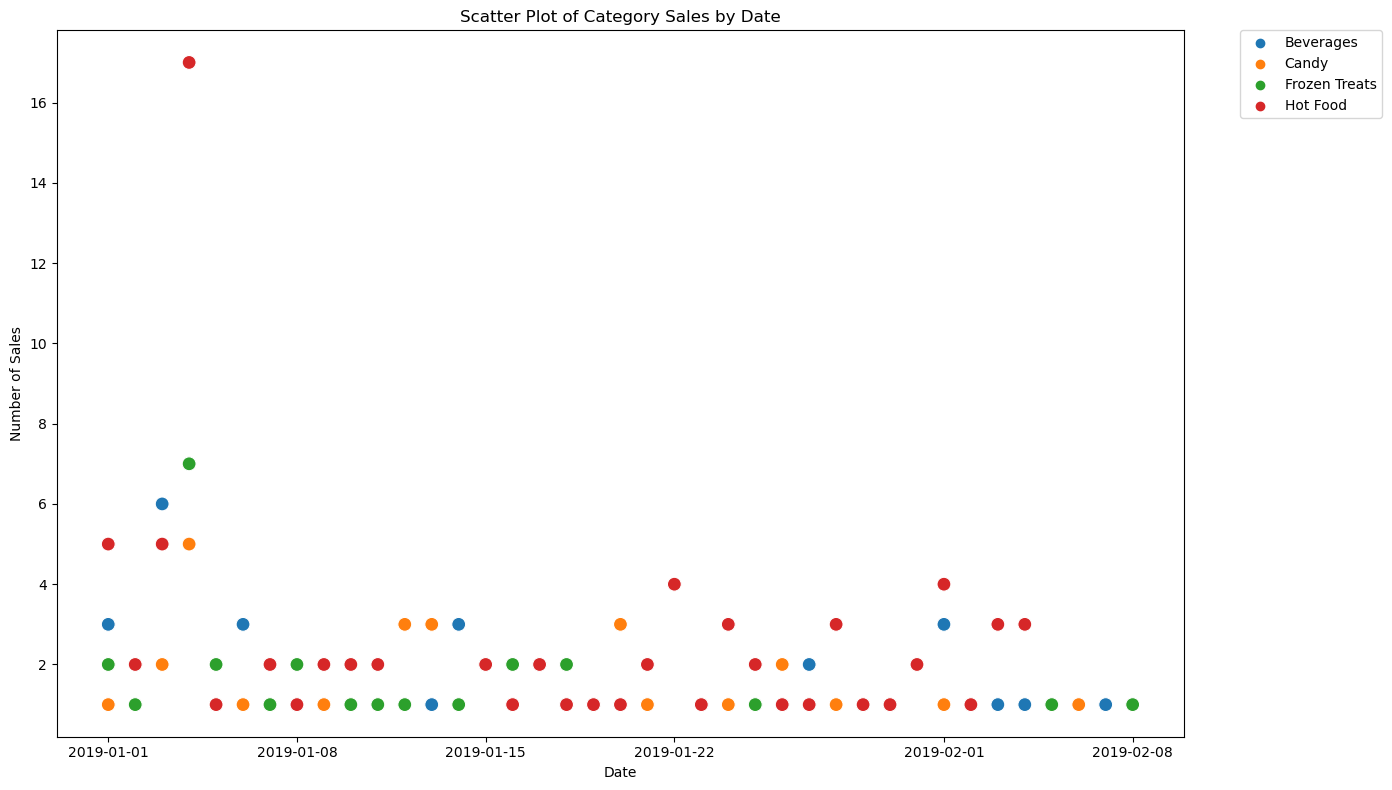

In [59]:
# histogram

import seaborn as sns


# group data by 'category' and 'date' and count the number of sales

category_sales_by_date = bb_df.groupby(['Category', 'Date']).size().reset_index(name='Sales')

plt.figure(figsize=(14, 8))


sns.scatterplot(data=category_sales_by_date, x='Date', y='Sales', hue='Category', s=100)

plt.title('Scatter Plot of Category Sales by Date')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

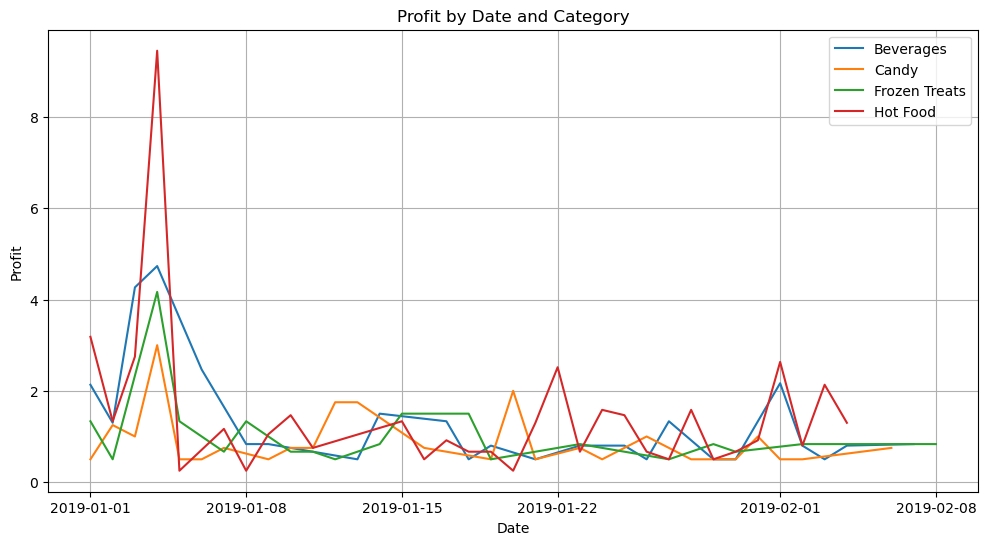

In [35]:
# Line Chart

# group by Date and Category

profit_by_date_category = bb_df.groupby(['Date', 'Category'])['Profit'].sum().reset_index()


plt.figure(figsize=(12, 6))

# iterate over unique categories and plot a line for each

for category in profit_by_date_category['Category'].unique():
    category_data = profit_by_date_category[profit_by_date_category['Category'] == category]
    plt.plot(category_data['Date'], category_data['Profit'], label=category)

plt.title('Profit by Date and Category')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.show()